In [1]:
from altair import Chart, X, Y, expr, Formula, Color, Legend, Scale, Order
import pandas as pd

In [2]:
data = pd.DataFrame.from_csv('cleaned.csv')

Use the logic from the selection spreadsheet to group locations into "Others" category.

In [3]:
other_locations = {'location':  ["Asia", "Eastern Europe", "Africa", "South America", "Middle East", "Oceania", "Central America"]}

In [4]:
data.loc[data.isin(other_locations).location, 'location'] = "Other"

Update position categories using grouping from selection notebook.

In [5]:
other_positions = {'position': [' gentleman scientist', 'Contractor', 'Data Process Developer', 'Guest researcher', 'Non-Academic', 'Research Software Developer', 'Research engineer', 'Software Engineer']}
data.loc[data.isin(other_positions).position, 'position'] = "Other"

In [6]:
grad_positions = {'position': ['PhD Student', 'PhD student', 'Student researcher completed Masters last summer', 'Fresh graduate']}
data.loc[data.isin(grad_positions).position, 'position'] = 'Graduate/Postgraduate student'

Replace "BNK" with "No Repsonse"

In [7]:
data.loc[data.gender == "BNK", "gender"] = " No Response"
data.loc[data.race == "BNK", "race"] = " No Response"

Replace 0/1 in support with 'Received Travel Support', 'No Travel Support'

In [8]:
data.loc[data.funded == 1, 'funded'] = 'Travel Support'
data.loc[data.funded == 0, 'funded'] = 'No Travel Support'

In [9]:
registered = data.loc[data['registered'] == 1]

In [22]:
x_gender = X('gender', title='Identify as underrepresented gender')
x_race = X('race', title='Identify as underrepresented race/ethnicity')
x_funded = X('funded', title=' ')

y_fraction_registered = Y('count(*)', title='Fraction of registered attendees')
y_fraction_overall = Y('count(*)', title='Fraction of applicants')

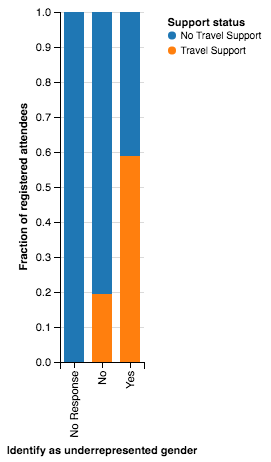

In [11]:
Chart(registered).mark_bar(stacked='normalize').encode(
    x=x_gender,
    y=y_fraction_registered,
    color=Color('funded:N', legend=Legend(title='Support status')),
)
# stacked='normalize'

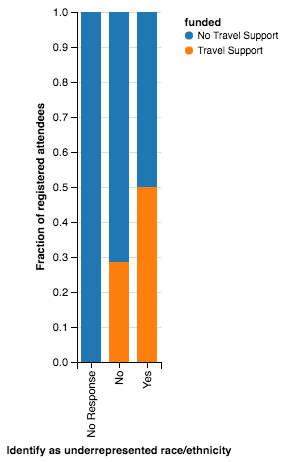

In [12]:
Chart(registered).mark_bar(stacked='normalize').encode(
    x=x_race,
    y=y_fraction_registered,
    color='funded:N'
)

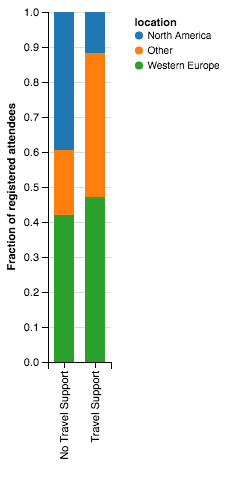

In [23]:
Chart(data).mark_bar(stacked='normalize').encode(
    x=x_funded,
    y=y_fraction_registered,
    color='location:N'
).transform_data(
    filter=(expr.df.registered == 1)
)

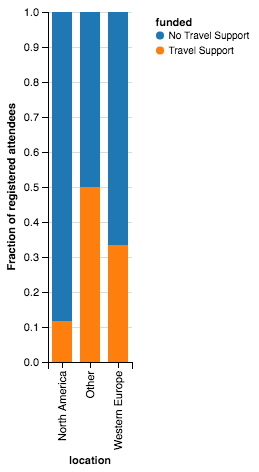

In [14]:
Chart(data).mark_bar(stacked='normalize').encode(
    x='location:N',
    y=y_fraction_registered,
    color='funded:N'
).transform_data(
    filter=(expr.df.registered == 1)
)

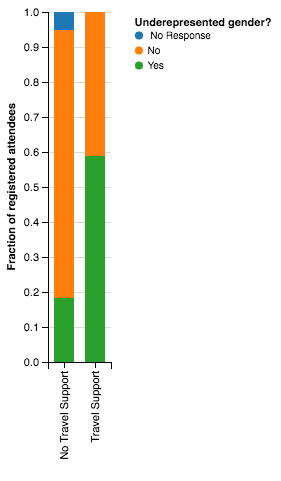

In [24]:
Chart(registered).mark_bar(stacked='normalize').encode(
    x=x_funded,
    y=y_fraction_registered,
    color=Color('gender:N', legend=Legend(title='Underepresented gender?')),
)

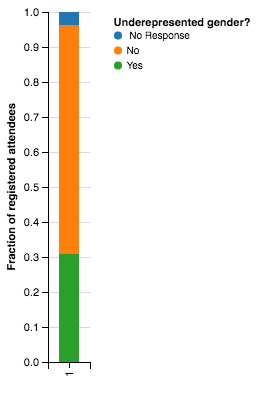

In [25]:
Chart(registered).mark_bar(stacked='normalize').encode(
    x=x_funded,
    y=y_fraction_registered,
    color=Color('gender:N', legend=Legend(title='Underepresented gender?')),
).transform_data(
    calculate=[Formula('funded', expr.where(expr.df.funded == 0, 1, 1))]
)

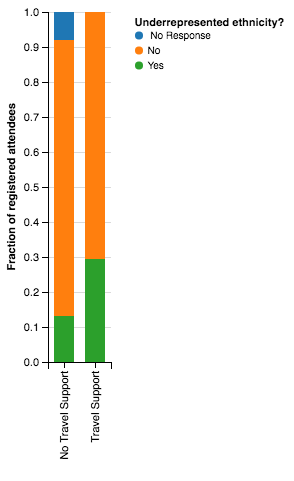

In [26]:
Chart(registered).mark_bar(stacked='normalize').encode(
    x=x_funded,
    y=y_fraction_registered,
    color=Color('race:N', legend=Legend(title='Underrepresented ethnicity?'))
)

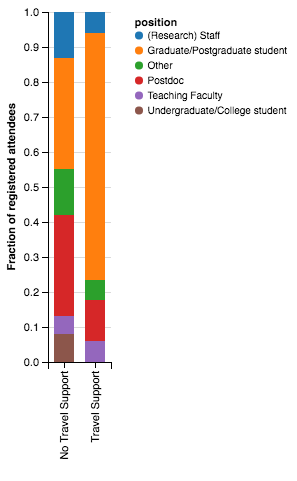

In [27]:
c1 = Chart(registered).mark_bar(stacked='normalize').encode(
    x=x_funded,
    y=y_fraction_registered,
    color='position:N'
)
c1.display()


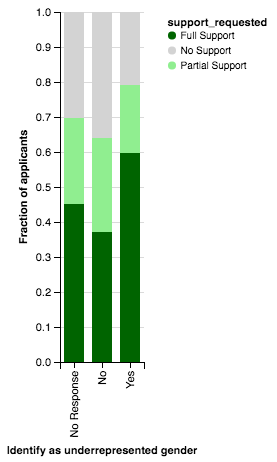

In [19]:
# scale = Scale(domain=['No Support', 'Partial Support', 'Full Support'],
#              range=['lightgreen', 'yellow', 'red'])
Chart(data).mark_bar(stacked='normalize').encode(
    x=x_gender,
    y=y_fraction_overall,
    #color='support_order:O',
    color=Color('support_requested:N', scale=Scale(range=['DarkGreen', 'LightGrey', 'LightGreen'])),
    order='support_order'
).transform_data(
    calculate=[Formula('Support', expr.where(expr.df.support_requested == 'No Support', 'No', 'Yes')),
               Formula('support_order', expr.where(expr.df.support_requested == 'Full Support', '0', 
                                                   expr.where(expr.df.support_requested == 'Partial Support', '1', '2')))]
)

#   calculate=[Formula('funded', expr.where(expr.df.funded == 0, 1, 1))]

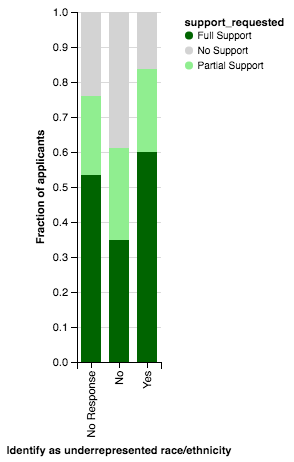

In [20]:
Chart(data).mark_bar(stacked='normalize').encode(
    x=x_race,
    y=y_fraction_overall,
    #color='support_order:O',
    color=Color('support_requested:N', scale=Scale(range=['DarkGreen', 'LightGrey', 'LightGreen'])),
    order='support_order'
).transform_data(
    calculate=[Formula('Support', expr.where(expr.df.support_requested == 'No Support', 'No', 'Yes')),
               Formula('support_order', expr.where(expr.df.support_requested == 'Full Support', '0', 
                                                   expr.where(expr.df.support_requested == 'Partial Support', '1', '2')))]
)

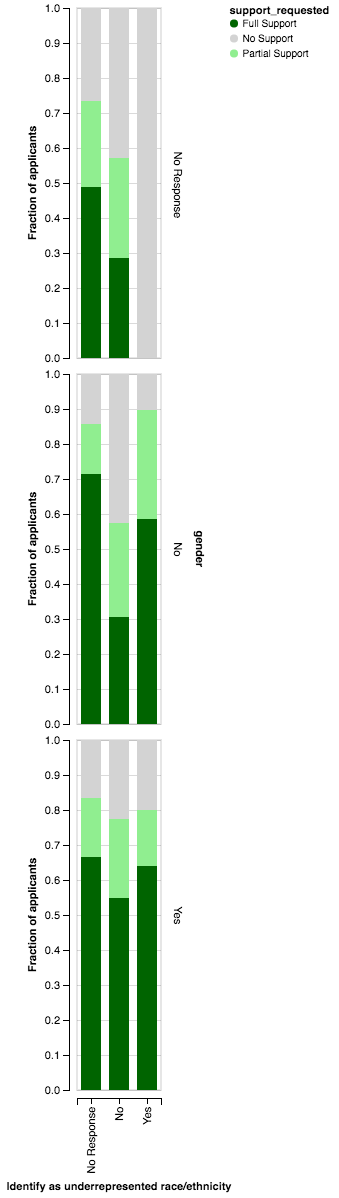

In [21]:
Chart(data).mark_bar(stacked='normalize').encode(
    x=x_race,
    y=y_fraction_overall,
    row='gender',
    #color='support_order:O',
    color=Color('support_requested:N', scale=Scale(range=['DarkGreen', 'LightGrey', 'LightGreen'])),
    order='support_order'
).transform_data(
    calculate=[Formula('Support', expr.where(expr.df.support_requested == 'No Support', 'No', 'Yes')),
               Formula('support_order', expr.where(expr.df.support_requested == 'Full Support', '0', 
                                                   expr.where(expr.df.support_requested == 'Partial Support', '1', '2')))]
)

## Make some plots illustrating net effect of funding

One bar chart will be the particpants who registered and received no support, the other will be all participants.

First we make a new dataframe that is the concatenation of two copies of the original, with two different values in a dummy column used only to add an axis.

In [69]:
data_dup = pd.concat([data, data])

In [70]:
data_dup = data_dup.assign(dummy=pd.Series(['All participants'] * len(data_dup)))

In [74]:
import numpy as np
foo = np.arange(570)
last_half = foo >= 285
not_funded = data_dup.funded == 'No Travel Support'
data_dup.loc[last_half, 'dummy'] = 'ignore'
data_dup.loc[last_half & not_funded, 'dummy'] = ' No Support'

In [72]:
x_dummy = X('dummy:N', title=' ')

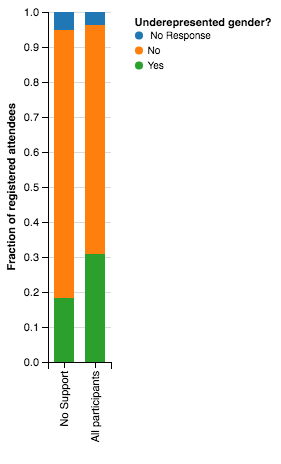

In [75]:
Chart(data_dup).mark_bar(stacked='normalize').encode(
    x=x_dummy,
    y=y_fraction_registered,
    color=Color('gender:N', legend=Legend(title='Underepresented gender?')),
).transform_data(
    filter=(expr.df.registered == 1, expr.df.dummy != 'ignore')
)

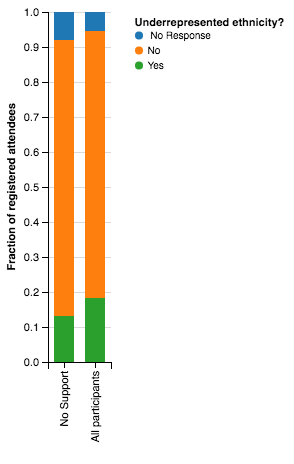

In [76]:
Chart(data_dup).mark_bar(stacked='normalize').encode(
    x=x_dummy,
    y=y_fraction_registered,
    color=Color('race:N', legend=Legend(title='Underrepresented ethnicity?'))
).transform_data(
    filter=(expr.df.registered == 1, expr.df.dummy != 'ignore')
)

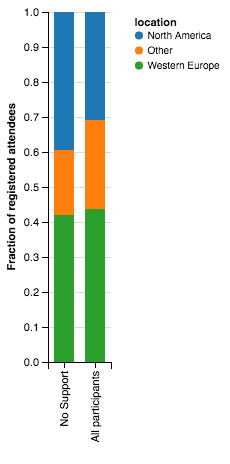

In [77]:
Chart(data_dup).mark_bar(stacked='normalize').encode(
    x=x_dummy,
    y=y_fraction_registered,
    color='location:N'
).transform_data(
    filter=(expr.df.registered == 1, expr.df.dummy != 'ignore')
)

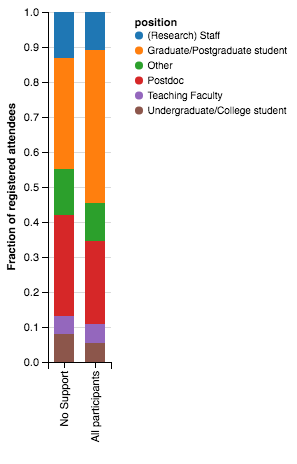

In [78]:
Chart(data_dup).mark_bar(stacked='normalize').encode(
    x=x_dummy,
    y=y_fraction_registered,
    color='position:N'
).transform_data(
    filter=(expr.df.registered == 1, expr.df.dummy != 'ignore')
)

In [56]:
data_dup.funded

ID
1      No Travel Support
2      No Travel Support
3      No Travel Support
4      No Travel Support
5      No Travel Support
6      No Travel Support
7      No Travel Support
8      No Travel Support
9      No Travel Support
10     No Travel Support
11        Travel Support
12     No Travel Support
13     No Travel Support
14     No Travel Support
15     No Travel Support
16     No Travel Support
17     No Travel Support
18     No Travel Support
19     No Travel Support
20     No Travel Support
21     No Travel Support
22     No Travel Support
23     No Travel Support
24     No Travel Support
25     No Travel Support
26     No Travel Support
27     No Travel Support
28        Travel Support
29     No Travel Support
30     No Travel Support
             ...        
256    No Travel Support
257    No Travel Support
258    No Travel Support
259    No Travel Support
260    No Travel Support
261    No Travel Support
262    No Travel Support
263    No Travel Support
264    No Travel Suppo